## Approaching (Almost) Any Machine Learning Problem

## MNIST Dataset -

We use matplotlib and seaborn for plotting, numpy to handle the numerical arrays, 
pandas to create dataframes from the numerical arrays and scikit-learn (sklearn) to 
get the data and perform t-SNE.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn import datasets, manifold

import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
#import MNIST Dataset

data = datasets.fetch_openml('mnist_784', version=1, return_X_y=True)
#data = pd.DataFrame(data)
#data.to_csv("mnist_train_folds.csv")
pixel_values, targets = data
targets = targets.astype(int)

In this part of the code, we have fetched the data using sklearn datasets, and we 
have an array of pixel values and another array of targets. Since the targets are of
string type, we convert them to integers.
pixel_values is a 2-dimensional array of shape 70000x784. There are 70000 
different images, each of size 28x28 pixels. Flattening 28x28 gives 784 data points.

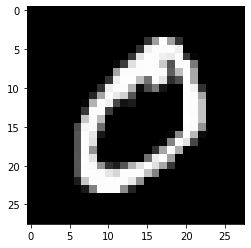

In [19]:
#single_image = pixel_values[1,:].reshape(28, 28)
single_image = pixel_values.iloc[1,:].values.reshape(28, 28)
plt.imshow(single_image, cmap='gray')

In [21]:
tsne = manifold.TSNE(n_components=2, random_state=42)
transformed_data = tsne.fit_transform(pixel_values.iloc[:3000, :])

This step creates the t-SNE transformation of the data. We use only two components 
as we can visualize them well in a two-dimensional setting. The transformed_data, 
in this case, is an array of shape 3000x2 (3000 rows and 2 columns).

In [23]:
tsne_df = pd.DataFrame(np.column_stack((transformed_data, targets[:3000])), columns=["x", "y", "targets"])
tsne_df.loc[:, "targets"] = tsne_df.targets.astype(int)

Here we are creating a pandas dataframe from a numpy array. There are three 
columns: x, y and targets. x and y are the two components from t-SNE 
decomposition and targets is the actual number

In [24]:
tsne_df.head()

,x,y,targets
0,-5.281551,-28.952768,5
1,-26.105896,-68.069321,0
2,-42.503582,35.580391,4
3,38.893967,26.663395,1
4,-14.770573,35.433247,9


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


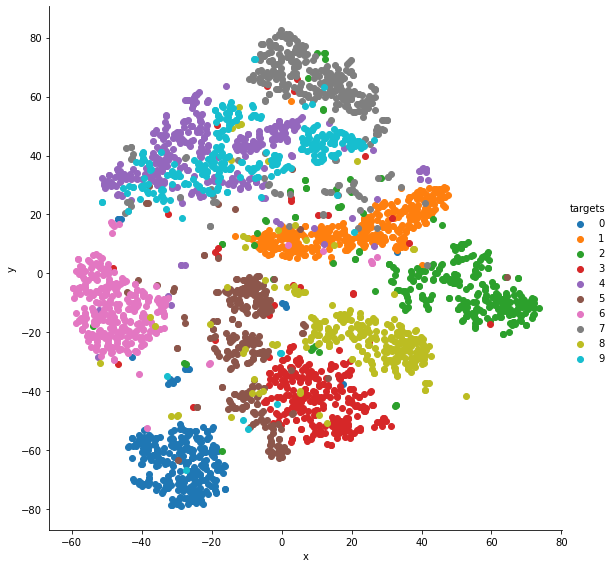

In [25]:
grid = sns.FacetGrid(tsne_df, hue="targets", size=8)
grid.map(plt.scatter, "x", "y").add_legend()